# Chapter 7. 다양한 모델을 결합한 앙상블 학습

## 7.1 앙상블 학습

여러 분류기를 하나의 메타 분류기로 연결하여 개별 분류기보다 더 좋은 일반화 성능을 달성
개별 분류기에 대한 오류율보다 앙상블의 예측이 틀릴 확률이 훨씬 낮다.

In [2]:
# 이항 분포의 확률 질량 함수 구현하여
# 앙상블 기법의 오류 확률 반환하기
from scipy.special import comb
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    prob = [comb(n_classifier, k) *
            error**k *
            (1-error)**(n_classifier - k)
            for k in range(k_start, n_classifier + 1)]
    return sum(prob)

In [3]:
ensemble_error(n_classifier=11, error=0.25)

0.03432750701904297

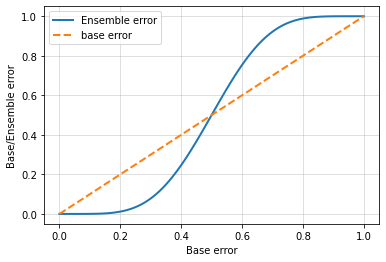

In [4]:
# 앙상블과 개별 분류기 에러 사이의 관계 시각화
import numpy as np
import matplotlib.pyplot as plt

error_range = np.arange(0.0, 1.01, 0.01)
ens_error = [ensemble_error(n_classifier=11, error=error)
             for error in error_range]
plt.plot(error_range, ens_error,
         label='Ensemble error',
         linewidth=2)
plt.plot(error_range, error_range,
         linestyle='--', label='base error',
         linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()

# when base error < 0.5, error of ensemble always better than each separator.

## 7.2 다수결 투표를 사용한 분류 앙상블

### 7.2.1 간단한 다수결 투표 분류기 구현

여러가지 분류 모델의 신뢰도에 가중치를 부여하여 연결  
특정 데이터셋에서 개별 분류기의 약점을 보완하는 강력한 메타 분류기를 구축  


In [5]:
# 다수결 투표 구현하기
import numpy as np
np.argmax(np.bincount([0, 0, 1],
                      weights=[0.2, 0.2, 0.6]))

1

In [6]:
# 클래스 확률 기반으로 가중치가 적용된 다수결 투표 구현하기
ex = np.array([[0.9, 0.1],
              [0.8, 0.2],
              [0.4, 0.6]])
p = np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])
p

array([0.58, 0.42])

In [7]:
np.argmax(p)

0